# Model Selection
## Alicia Brown
### 143960

### Paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

### Lectura

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLinPoli2.csv") ##insert your own path

### División en prueba de entrenamiento y prueba

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75)
#print X_train.columns.values

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Conversión a arreglos

In [4]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

### Estandarización de los datos

In [5]:
def normalize(X_train,X_test,Y_train,Y_test,do=True):

    scale_X=preprocessing.StandardScaler()
    scale_y=preprocessing.StandardScaler()
    
    train_X=np.copy(X_train)
    train_y=np.copy(Y_train)
    test_X=np.copy(X_test)
    test_y=np.copy(Y_test)
    if do:
        scale_X.fit(train_X)
        scale_y.fit(train_y)
        train_X=scale_X.transform(train_X)
        train_y=scale_y.transform(train_y)
        test_X=scale_X.transform(test_X)
        test_y=scale_y.transform(test_y)
    return train_X,test_X, train_y, test_y

### Regresión iterativa con regularización

In [6]:
def salida(w,X):
    return X.dot(w[1:]) +w[0]

In [7]:
def entrena(X,y,w,la=0.0,eta=0.01):
    
    for i in range(len(X)):
        error=y[i]-salida(w,X[i])
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
    return w

### Error

In [52]:
def calcError(X, Y, w):
    return np.mean((X.dot(w[1:])+ w[0] - Y)**2)

### Prueba

In [53]:
train_X,test_X,train_y,test_y=normalize(X_train,X_test,Y_train,Y_test)

In [25]:
w=np.asarray([rnd.random() for i in range(1+len(train_X[0]))])
for i in range(100):
    w=entrena(train_X,train_y,w,la=0.00)

array([ 0.28505266,  0.68980876, -0.09980773,  0.65197627,  0.33096514,
        0.09556427,  0.14563575,  0.39184274,  0.53129543,  0.31038871,
        0.04719415,  0.01615541, -0.06892898,  0.01613069, -0.02280822,
        0.00178009, -0.06336379,  0.02580427,  0.01649765,  0.04891604,
       -0.03655368,  0.02334026, -0.04857188, -0.08823119,  0.04347581,
        0.01555752, -0.00612428,  0.00564362,  0.02820058,  0.03061698,
       -0.01020032,  0.0007134 ,  0.00374846, -0.01856776, -0.03886687,
        0.10875983, -0.14648453, -0.03032134, -0.00630573])

In [24]:
print calcError(train_X,train_y.flatten(),w[1:],w[0])
print calcError(test_X,test_y.flatten(),w[1:],w[0])

0.489110717296
0.479383529203


### Cross validation

In [54]:
def kSubsets(X_train,k):
    indice = np.random.choice(len(X_train), len(X_train), False)
    return [indice[i] % k for i in range(len(X_train))]

In [57]:
def crossVal(X_train,Y_train,w,k,lam):
    TrainSets = np.array(kSubsets(X_train, k))
    errores = []
    for i in range(k):
        Xe, Ye, Xp, Yp = X_train[TrainSets != i], Y_train[TrainSets != i], X_train[TrainSets == i], Y_train[TrainSets == i]
        w = entrena(Xe, Ye, w, lam)
        errores = np.append(errores, calcError(Xp, Yp.flatten(),w))
    errorProm = np.mean(errores)
    return w, errorProm

### Cambio de lambda

In [61]:
lam = np.linspace(0.0, 1.0, 100)
w=np.asarray([rnd.random() for i in range(1+len(train_X[0]))])
k = 10
errorProm = []
for i in range(len(lam)):
    w, errores = crossVal(train_X, train_y, w, k, lam[i])
    errorProm = np.append(errorProm, errores)
MinError = np.amin(errorProm)
OptLam = np.argmin(errorProm)
print lam[OptLam], MinError

0.0 0.544901268123


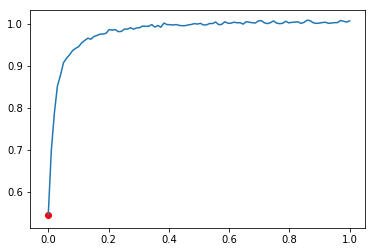

In [62]:
plt.plot(lam, errorProm)
plt.scatter(lam[OptLam], MinError, c='r')
plt.show()